In [53]:
import random

from networkx.classes import DiGraph
from xarray.core.utils import NDArrayMixin
from datetime import datetime
from boon import *
import netgraph
import os
from sympy.logic.boolalg import And, Or, Not, Implies, Equivalent
from sympy import SOPform

import networkx as nx
import matplotlib.pyplot as plt

In [62]:
n=20

In [63]:
b = BooN.random(n, p_link=0.1, p_pos=0.6, topology='Small-World')
b.pos = nx.circular_layout(b.interaction_graph)
print(b)

x2 = ¬x4
x11 = ¬x10 ∨ ¬x13
x8 = x7
x17 = ¬x15
x9 = ¬x11
x12 = ¬x10
x7 = x5
x14 = x12
x10 = ¬x8 ∨ ¬x9
x0 = true
x1 = true
x13 = true
x3 = x1
x5 = x4
x6 = x5
x15 = true
x4 = x3 ∨ ¬x6
x16 = true
x19 = true
x18 = ¬x16 ∨ ¬x19


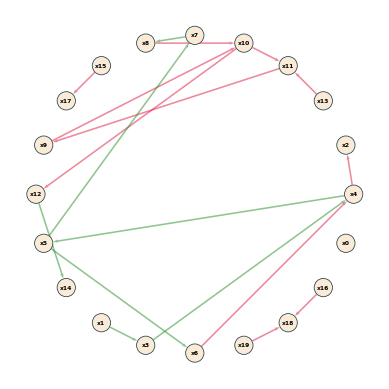

In [64]:

b.draw_IG()

In [65]:
b1 = BooN.random(n, p_link=0.5, p_pos=0.6, topology='Erdos-Reny')
b1.pos = nx.circular_layout(b.interaction_graph)
print(b1)

x2 = false
x11 = x16 ∧ ¬x18 ∧ ¬x4
x8 = x1 ∧ ¬x6
x17 = x13 ∨ ¬x1
x9 = x19 ∨ (x13 ∧ x3 ∧ ¬x14) ∨ (x7 ∧ ¬x1 ∧ ¬x8) ∨ (x11 ∧ x13 ∧ x17 ∧ ¬x13)
x12 = x3 ∨ x8 ∨ (x17 ∧ ¬x6) ∨ (x13 ∧ x16 ∧ ¬x17)
x7 = x4
x14 = (x15 ∨ x9) ∧ (x13 ∨ ¬x5) ∧ (x15 ∨ ¬x5) ∧ (x6 ∨ ¬x5)
x10 = (x0 ∨ x7) ∧ (x0 ∨ x9) ∧ (x0 ∨ ¬x8) ∧ (x7 ∨ ¬x16) ∧ (x9 ∨ ¬x16) ∧ (¬x16 ∨ ¬x8)
x0 = (x12 ∨ ¬x1) ∧ (x12 ∨ ¬x13) ∧ (x3 ∨ ¬x1) ∧ (x3 ∨ ¬x13) ∧ (x4 ∨ ¬x1) ∧ (x4 ∨ ¬x13)
x1 = x16
x13 = x8 ∧ ¬x2
x3 = ¬x5 ∨ (¬x1 ∧ ¬x17 ∧ ¬x4)
x5 = x13 ∨ ¬x2 ∨ (x10 ∧ x17 ∧ ¬x14) ∨ (x17 ∧ x8 ∧ ¬x14)
x6 = x13 ∧ x14 ∧ ¬x10 ∧ ¬x16 ∧ ¬x19
x15 = x13 ∨ (x18 ∧ x8 ∧ ¬x3) ∨ (x19 ∧ x3 ∧ ¬x18)
x4 = ¬x10 ∨ (x15 ∧ x17) ∨ (x17 ∧ ¬x1)
x16 = (¬x3 ∧ ¬x4) ∨ (x14 ∧ x19 ∧ x3 ∧ x5) ∨ (x9 ∧ ¬x17 ∧ ¬x5) ∨ (x17 ∧ x6 ∧ x9 ∧ ¬x19) ∨ (x1 ∧ x17 ∧ ¬x3 ∧ ¬x7)
x19 = x1 ∧ (x11 ∨ ¬x13) ∧ (x18 ∨ ¬x13) ∧ (x7 ∨ ¬x13)
x18 = (x10 ∨ ¬x13) ∧ (x13 ∨ ¬x6) ∧ (x13 ∨ ¬x7) ∧ (¬x13 ∨ ¬x17) ∧ (¬x13 ∨ ¬x4)


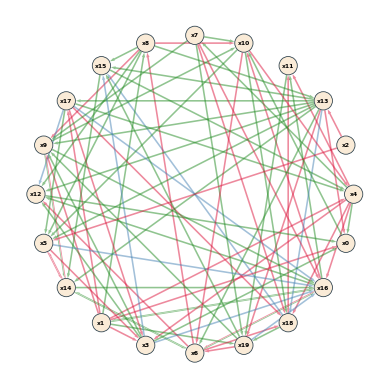

In [66]:
b1.draw_IG()

In [ ]:
trace_file = "bench-controllability-bionet.csv"
ftrace =  open(trace_file, "w")
ftrace.write("# BENCHMARK BIOLOGICAL NETWORK CONTROLLABILITY: "+datetime.now().strftime("%d-%b-%y %H")+"\n")

# BIOLOGICAL MODEL
path = 'Boolean Network'
files = os.listdir(path)
for file in files:
    print("FILE >>", file)
    model,extension = os.path.splitext(file)
    match extension:
        case '.bnet':
            boon = BooN.from_textfile(os.path.join(path, file))
        case '.sbml':
            boon = BooN.from_sbmlfile(os.path.join(path, file))
        case _:
            print("** ERROR EXTENSION>>", extension)

    # Total number of terms of the Boon
    totalterms = 0
    for formula in boon.desc.values():
        if not isinstance(formula, bool):
            for clause in formula.args:
                totalterms+=max(len(clause.args),1)

    ig  = boon.interaction_graph
    data = [(var,len(list(ig.predecessors(var)))) for var in ig.nodes()]
    nbpred = sorted(data, key=lambda pair: pair[1])
    print("NEIGHBORS>>",nbpred)

    mean = sum([pair[1] for pair in nbpred])/len(nbpred)

    val = 8
    for i  in range(len(nbpred)):
        if nbpred[i][1] >= val:
            v0= nbpred[i][0]
            v1= nbpred[i+1][0]
            break
    print("VARIABLES >>",v0,v1)

    stablestate = boon.stable_states
    eqpairs = { (eq[v0],eq[v1]) for eq in stablestate}
    freestates = {(True, True), (False, False), (True, False), (False, True)} - eqpairs

    # if freestates is empty meaning that all the Boolean configurations exist in the stable states, then skip the trial.
    if freestates:
        controlvalues = random.choice(list(freestates))
    else:
        continue

    # Define the query
    query = SOPform({v0,v1}, [dict(zip((v0,v1),controlvalues))])

    # Frozen variables excluding x0 x1
    frozenvars = boon.variables - {v0,v1}
    # Set control to boon
    boon.control(frozenvars, frozenvars)
    print(f"{model}: POSSIBILITY")
    # EVALUATE CONTROLLABILITY
    # POSSIBILITY
    start = datetime.now()
    # PROCESS THE TASK
    destiny = boon.possibly(query)
    core = BooN.destify(destiny, max_solutions=100, trace=True)  # The possibility is very fast, we do not need to trace it.
    actions_possibly = core2actions(core)
    # END TIMER
    end = datetime.now()
    duration_possibly = (end-start).total_seconds()
    print(f"{model}: NECESSITY")
    # NECESSITY
    start = datetime.now()
    # PROCESS THE TASK
    destiny = boon.necessary(query, trace=True)
    core = BooN.destify(destiny, max_solutions=100, trace=True, solver=GUROBI_CMD)
    actions_necessity = core2actions(core)
    # END TIMER
    end = datetime.now()
    duration_necessity = (end-start).total_seconds()

     # LINE CONTENT
    ftrace.write("%s, %s, %s, %d, %d, %d, %f, %f\n"%(model,str(v0),str(v1),len(actions_possibly),len(actions_necessity),totalterms, duration_possibly, duration_necessity))
    ftrace.flush()
    print(f"\r{model}: /", end="")

In [ ]:
from functools import reduce
def quotient_graph(graph, partition):
    # Initialize the quotient graph
    quotient_graph = nx.DiGraph()
    quotient_graph.add_nodes_from(partition)
    # Add edges between groups based on connections in the original graph
    for group1 in partition:
        all_neighbors = reduce(set.union, map(lambda node: set(graph.neighbors(node)), group1))
        for group2 in partition:
            if group1 != group2 and not group2.isdisjoint(all_neighbors):
                quotient_graph.add_edge(group1, group2)

    return quotient_graph

In [ ]:
def random_scc_graph(n:int, c:int,  p:float)->nx.DiGraph:
    maxsize = n // c

    G = nx.DiGraph()
    nbnodes = 0
    for _ in range(c):
        C = nx.DiGraph()
        size = random.randint(2,maxsize)
        nbnodes += size
        edges = [(i,(i+1)%size) for i in range(size)]
        C.add_edges_from(edges)

        G= nx.disjoint_union(G,C)

    C = nx.DiGraph()
    size = n - nbnodes
    edges = [(i,(i+1)%size) for i  in range(size)]
    C.add_edges_from(edges)
    G= nx.disjoint_union(G,C)

    for node1 in G.nodes():
        for node2 in G.nodes():
            if random.random() < p:
                G.add_edge(node1, node2)
    return G

In [ ]:
# BENCHMARK EVALUATION DE LA FONCTION QUOTIENT GRAPH COMPARISON
Nmin = 1000
Nmax = 10000
step = 500
for n in range(Nmin,Nmax+step,step):
    G = random_scc_graph(n, max(n//10,2),0.0001)
    scc= list(map(frozenset,nx.strongly_connected_components(G)))
    start = datetime.now()
    QG = quotient_graph(G, scc)
    end = datetime.now()
    qg_duration =  (end-start).total_seconds()
    start = datetime.now()
    QGX = nx.quotient_graph(G, scc)
    end = datetime.now()
    qgx_duration =  (end-start).total_seconds()
    print("%d, %d, %d, %d, %f, %f"%(n,len(scc),QG.number_of_edges(),QGX.number_of_edges(),qg_duration,qgx_duration))


In [ ]:
### Benchmark Possibility
# PARAMETERS OF THE BENCHMARK
# MINIMAL NUMBER OF NODES
Nmin = 100
# MAXIMAL NUMBER OF NODES
Nmax = 100
# NUMBER OF TRIALS
trials = 10
# STEPS
step = 10
# Open file for benchmark trace.
trace_file = "bench-possibility-ER.csv"  # Erdös Reny
# trace_file = "bench-possibility-SW.csv" # Small-World
ftrace = open(trace_file, "a")
ftrace.write("# BENCHMARK CONTROLLABILITY - POSSIBILITY: " + datetime.now().strftime("%d-%b-%y %H") + "\n")

x0, x1 = symbols('x0 x1')  # Define the variable.

for n in range(Nmin, Nmax + step, step):
    print("\r%3d    : *" % n, end="")
    for trial in range(trials):
        boon = BooN.random(n, p_link=0.25, p_pos=0.6, topology='Erdos-Reny')
        # boon = BooN.random(n, p_link=0.85, p_pos=0.6, topology='Small-World')

        print("\r%3d %3d: \\" % (n, trial), end="")
        # Total number of terms of the Boon
        totalterms = 0
        for formula in boon.desc.values():
            if not isinstance(formula, bool):
                for clause in formula.args:
                    totalterms += max(len(clause.args), 1)

        # Find a missing configuration in stable state
        stablestate = boon.stable_states
        eqpairs = {(eq[x0], eq[x1]) for eq in stablestate}
        freestates = {(True, True), (False, False), (True, False), (False, True)} - eqpairs

        # if freestates is empty meaning that all the Boolean configurations exist in the stable states, then skip the trial.
        if freestates:
            controlvalues = random.choice(list(freestates))
        else:
            continue

        # Define the query
        query = SOPform({x0, x1}, [dict(zip((x0, x1), controlvalues))])

        # Frozen variables excluding x0 x1
        frozenvars = boon.variables - {x0, x1}
        # Set control to boon
        boon.control(frozenvars, frozenvars)

        print("\r%3d %3d: |" % (n, trial), end="")
        # EVALUATE CONTROLLABILITY
        # POSSIBILITY
        start = datetime.now()
        # PROCESS THE TASK
        destiny = boon.possibly(query)
        core = BooN.destify(destiny, max_solutions=100, trace=True)  # The possibility is very fast, we do not need to trace it.
        actions_possibly = core2actions(core)
        # END TIMER
        end = datetime.now()
        duration_possibly = (end - start).total_seconds()

        print("\r%3d %3d: ―" % (n, trial), end="")

        # LINE CONTENT
        # size, trial number, number of solutions for possibility, number of terms, possibility duration
        ftrace.write("%d, %d, %d, %d, %f\n" % (n, trial, len(actions_possibly), totalterms, duration_possibly))
        ftrace.flush()
        print("\r%3d-%3d: /" % (n, trial), end="")

    print("\r%3d    : ." % n, end="")
    ftrace.flush()

print(">> END CONTROLLABILITY BENCHMARK")
ftrace.close()

In [ ]:
### Benchmark Necessity

# PARAMETERS OF THE BENCHMARK
# MINIMAL NUMBER OF NODES
Nmin = 10
# MAXIMAL NUMBER OF NODES
Nmax = 12
# NUMBER OF TRIALS
trials = 10
# STEPS
step = 10
# Open trace file for benchmark
trace_file = "bench-controllability-detail-ER.csv"  # Erdös Reny
# trace_file = "bench-controllability-detail-SW.csv" # Small-World
ftrace = open(trace_file, "a")
ftrace.write("# BENCHMARK CONTROLLABILITY DETAILED: " + datetime.now().strftime("%d-%b-%y %H") + "\n")

x0, x1 = symbols('x0 x1')  # Define the variable.

for n in range(Nmin, Nmax + step, step):
    print("\r%3d    : *" % n, end="")
    for trial in range(trials):
        boon = BooN.random(n, p_link=0.25, p_pos=0.6, topology='Erdos-Reny')
        # boon = BooN.random(n, p_link=0.6, p_pos=0.6, topology='Small-World')

        print("\r%3d %3d: \\" % (n, trial), end="")
        # Total number of terms of the Boon
        totalterms = 0
        for formula in boon.desc.values():
            if not isinstance(formula, bool):
                for clause in formula.args:
                    totalterms += max(len(clause.args), 1)

        # Find a missing configuration in stable state
        stablestate = boon.stable_states
        eqpairs = {(eq[x0], eq[x1]) for eq in stablestate}
        freestates = {(True, True), (False, False), (True, False), (False, True)} - eqpairs

        # if freestates is empty meaning that all the Boolean configurations exist in the stable states, then skip the trial.
        if freestates:
            controlvalues = random.choice(list(freestates))
        else:
            continue

        # Define the query
        query = SOPform({x0, x1}, [dict(zip((x0, x1), controlvalues))])

        # Frozen variables excluding x0 x1
        frozenvars = boon.variables - {x0, x1}
        # Set control to boon
        boon.control(frozenvars, frozenvars)

        print("\r%3d %3d: |" % (n, trial), end="")
        # QUERY
        start = datetime.now()
        destiny = boon.necessary(query, trace=True)
        end = datetime.now()
        # END TIMER
        duration_query = (end - start).total_seconds()

        print("\r%3d %3d: ―" % (n, trial), end="")
        # CONTROL DISCOVERY
        start = datetime.now()
        duration_necessity = (end - start).total_seconds()
        core = BooN.destify(destiny, trace=True, solver=GUROBI_CMD)
        actions_necessity = core2actions(core)
        end = datetime.now()
        # END TIMER
        duration_necessity = (end - start).total_seconds()

        # LINE CONTENT
        # size, trial number, number of solutions for necessity, number of clauses if the CNF query, number of terms, query duration, resolution duration
        ftrace.write("%d, %d, %d, %d, %d, %f, %f\n" % (n, trial, len(actions_necessity), len(destiny.args), totalterms, duration_query, duration_necessity))
        ftrace.flush()
        print("\r%3d-%3d: /" % (n, trial), end="")

    print("\r%3d    : ." % n, end="")
    ftrace.flush()
print(">> END NECESSITY BENCHMARK")
ftrace.close()

In [ ]:
### Possibility and Necessity

# PARAMETERS OF THE BENCHMARK
# MINIMAL NUMBER OF NODES
Nmin = 3
# MAXIMAL NUMBER OF NODES
Nmax = 15
# NUMBER OF TRIALS
trials = 10
# STEPS
step = 1

# Open file for benchmark trace.
# trace_file = "bench-controllability-ER.csv" # Erdös Reny
trace_file = "bench-controllability-SW.csv"  # Small-World
ftrace =  open(trace_file, "a")
ftrace.write("# BENCHMARK CONTROLLABILITY: "+datetime.now().strftime("%d-%b-%y %H")+"\n")

x0, x1  = symbols('x0 x1') # Define the variable.

for n in range(Nmin,Nmax+step,step):
    print("\r%3d    : *"%n, end="")
    for trial in range(trials):
      # boon = BooN.random(n, p_link=0.5, p_pos=0.6, topology='Erdos-Reny')
        boon = BooN.random(n, p_link=0.1, p_pos=0.6, topology='Small-World')

        print("\r%3d %3d: \\"%(n,trial), end="")
         # Total number of terms of the Boon
        totalterms = 0
        for formula in boon.desc.values():
            if not isinstance(formula, bool):
                for clause in formula.args:
                    totalterms+=max(len(clause.args),1)

         # Find a missing configuration in stable state
        stablestate = boon.stable_states
        eqpairs = { (eq[x0],eq[x1]) for eq in stablestate}
        freestates = {(True, True), (False, False), (True, False), (False, True)} - eqpairs

        # if freestates is empty meaning that all the Boolean configurations exist in the stable states, then skip the trial.
        if freestates:
            controlvalues = random.choice(list(freestates))
        else:
            continue  # This never has occurred.

        # Define the query
        query = SOPform({x0,x1}, [dict(zip((x0,x1),controlvalues))])

        # Frozen variables excluding x0 x1
        frozenvars = boon.variables - {x0,x1}

        # Set control to boon
        boon.control(frozenvars, frozenvars)

        print("\r%3d %3d: |"%(n,trial), end="")
        # EVALUATE CONTROLLABILITY
        # POSSIBILITY
        start = datetime.now()
        destiny = boon.possibly(query)
        core = BooN.destify(destiny, trace=False, max_solutions = 100, solver=GUROBI_CMD)
        # The possibility is very fast, we do not need to trace it.
        actions_possibly = core2actions(core)
        end = datetime.now()
        duration_possibly = (end-start).total_seconds()

        print("\r%3d %3d: ―"%(n,trial), end="")
        # NECESSITY
        start = datetime.now()
        destiny = boon.necessary(query, trace=True)
        core = BooN.destify(destiny, max_solutions = 100, trace=True, solver=GUROBI_CMD)
        actions_necessity = core2actions(core)
        end = datetime.now()
        duration_necessity = (end-start).total_seconds()

        # LINE CONTENT
        # size, trial number, number of solutions for possibility, number of solutions for necessity, number of terms, possibility duration, necessity duration
        ftrace.write("%d, %d, %d, %d, %d, %f, %f\n"%(n,trial,len(actions_possibly),len(actions_necessity),totalterms, duration_possibly, duration_necessity))
        ftrace.flush()
        print("\r%3d-%3d: /"%(n,trial), end="")

    print("\r%3d    : ."%n, end="")
    ftrace.flush()

print(">> END CONTROLLABILITY BENCHMARK")
ftrace.close()